## Daten zusammenfügen und erster Blick auf die Daten

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Datensatz einlesen
umsatzdaten = pd.read_csv('0_DataPreparation/umsatzdaten_gekuerzt.csv')
wetter = pd.read_csv('0_DataPreparation/wetter.csv')
kiwo = pd.read_csv('0_DataPreparation/kiwo.csv')

# Daten zusammenführen als outer join
merged_data = pd.merge(umsatzdaten, wetter, on='Datum', how='outer')
merged_data = pd.merge(merged_data, kiwo, on='Datum', how='outer')

# Umsatzdaten anzeigen
print(merged_data.head())
print(merged_data.info())

# Deskriptive Statistik für Umsatzdaten
print(merged_data.describe())
print(merged_data.isnull())



        Datum  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0  2012-01-01          NaN     NaN         8.0      9.8250   
1  2012-01-02          NaN     NaN         7.0      7.4375   
2  2012-01-03          NaN     NaN         8.0      5.5375   
3  2012-01-04          NaN     NaN         4.0      5.6875   
4  2012-01-05          NaN     NaN         6.0      5.3000   

   Windgeschwindigkeit  Wettercode  KielerWoche  
0                 14.0        58.0          NaN  
1                 12.0         NaN          NaN  
2                 18.0        63.0          NaN  
3                 19.0        80.0          NaN  
4                 23.0        80.0          NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10119 entries, 0 to 10118
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datum                10119 non-null  object 
 1   Warengruppe          9334 non-null   float64
 2   Umsatz        

## Temperatur in kategoriale Variable transformieren und Feiertage hinzufügen

In [2]:
# Temperatur in kategoriale Variable umwandeln (Kategorien numerisch kodiert)
merged_data['Temperatur_kat'] = pd.cut(merged_data['Temperatur'], bins=[-10, 0, 20, 45], labels=[0, 1, 2])


In [3]:
import pandas as pd
import holidays

# Liste der Feiertage für Deutschland
de_holidays = holidays.Germany()

# Datumsbereich
start_date = '2012-01-01'
end_date = '2019-08-01'

# Liste aller Tage im Datumsbereich
date_range = pd.date_range(start=start_date, end=end_date)

# Liste zur Speicherung des Feiertagsstatus
holiday_status = []

# Überprüfung jedes Datums auf Feiertag
for date in date_range:
    if date in de_holidays:
        holiday_status.append(1)  # Feiertag
    else:
        holiday_status.append(0)  # normaler Tag

# Erstellen eines DataFrame mit Datum und Feiertagsstatus
holiday_df = pd.DataFrame({'Datum': date_range, 'Feiertag': holiday_status})

# Anzeigen der ersten Zeilen des DataFrame
print(holiday_df.head())

# Datum in umsatzdaten in datetime umwandeln
merged_data['Datum'] = pd.to_datetime(merged_data['Datum'])

# holiday_df mit umsatzdaten zusammenführen
merged_data = pd.merge(merged_data, holiday_df, on='Datum', how='outer')

# Anzeigen der ersten Zeilen des DataFrame
print(merged_data)

       Datum  Feiertag
0 2012-01-01         1
1 2012-01-02         0
2 2012-01-03         0
3 2012-01-04         0
4 2012-01-05         0
           Datum  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0     2012-01-01          NaN     NaN         8.0      9.8250   
1     2012-01-02          NaN     NaN         7.0      7.4375   
2     2012-01-03          NaN     NaN         8.0      5.5375   
3     2012-01-04          NaN     NaN         4.0      5.6875   
4     2012-01-05          NaN     NaN         6.0      5.3000   
...          ...          ...     ...         ...         ...   
10280 2019-07-28          NaN     NaN         3.0     23.3500   
10281 2019-07-29          NaN     NaN         6.0     25.2500   
10282 2019-07-30          NaN     NaN         7.0     20.7375   
10283 2019-07-31          NaN     NaN         6.0     20.4500   
10284 2019-08-01          NaN     NaN         5.0     21.0625   

       Windgeschwindigkeit  Wettercode  KielerWoche Temperatur_kat  Feiertag  
0 

## Variable Wochenende hinzufügen

In [4]:
merged_data['Datum'] = pd.to_datetime(merged_data['Datum'])
merged_data['Wochenende'] = merged_data['Datum'].dt.dayofweek >= 5


## Variable Temperaturabweichung vom Monatsmittel hinzufügen und binäre Variablen numerisch kodieren

In [5]:
# Variable für Temperaturabweichung um Mittelwert der Temperatur für jeden Monat berechnen
# Um die Monate zu extrahieren
merged_data['Monat'] = merged_data['Datum'].dt.month

# Mittelwerte der Temperatur für jeden Monat berechnen
monatsmittel_temp = merged_data.groupby('Monat')['Temperatur'].transform('mean')

# Um die Temperaturabweichung zu berechnen
merged_data['Temp_abw'] = (merged_data['Temperatur'] - monatsmittel_temp).abs() > 5

# Kieler Woche, Wochenende und Temp.abw binär mit 0 und 1 kodieren
merged_data['KielerWoche'] = merged_data['KielerWoche'].fillna(0).astype(int)
merged_data['Wochenende'] = merged_data['Wochenende'].fillna(0).astype(int)
merged_data['Temp_abw'] = merged_data['Temp_abw'].fillna(0).astype(int)

# Anzeigen der ersten Zeilen des DataFrame mit der neuen Spalte
print(merged_data.head())

# Wie oft True für Temp_abw
print(merged_data['Temp_abw'].value_counts())


       Datum  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0 2012-01-01          NaN     NaN         8.0      9.8250   
1 2012-01-02          NaN     NaN         7.0      7.4375   
2 2012-01-03          NaN     NaN         8.0      5.5375   
3 2012-01-04          NaN     NaN         4.0      5.6875   
4 2012-01-05          NaN     NaN         6.0      5.3000   

   Windgeschwindigkeit  Wettercode  KielerWoche Temperatur_kat  Feiertag  \
0                 14.0        58.0            0              1         1   
1                 12.0         NaN            0              1         0   
2                 18.0        63.0            0              1         0   
3                 19.0        80.0            0              1         0   
4                 23.0        80.0            0              1         0   

   Wochenende  Monat  Temp_abw  
0           1      1         1  
1           0      1         0  
2           0      1         0  
3           0      1         0  
4          

## Bewölkung und Windgeschwindigkeit in kategoriale Variable transformieren

In [6]:
# Variable erstellen, die die Bewölkung in kategoriale Variable umwandelt
merged_data['Bewoelkung_kat'] = pd.cut(merged_data['Bewoelkung'], bins=[0, 3, 6, 9], labels=[0, 1, 2])

# Anzeigen der ersten Zeilen des DataFrame mit der neuen Spalte
print(merged_data.head())

# Nur minimal größerer Zusammenhang zwischen Bewölkung und Umsatz (siehe Korrelation)

# Windgeschwindigkeit in kategoriale Variable (minimum 3 und mximum 35) umwandeln
merged_data['Windgeschwindigkeit_kat'] = pd.cut(merged_data['Windgeschwindigkeit'], bins=[0, 5, 10, 15, 20, 25, 30, 35], labels=[0, 1, 2, 3, 4, 5, 6])

# Anzeigen der ersten Zeilen des DataFrame mit der neuen Spalte
print(merged_data.head())
print(merged_data.isna().sum())

       Datum  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0 2012-01-01          NaN     NaN         8.0      9.8250   
1 2012-01-02          NaN     NaN         7.0      7.4375   
2 2012-01-03          NaN     NaN         8.0      5.5375   
3 2012-01-04          NaN     NaN         4.0      5.6875   
4 2012-01-05          NaN     NaN         6.0      5.3000   

   Windgeschwindigkeit  Wettercode  KielerWoche Temperatur_kat  Feiertag  \
0                 14.0        58.0            0              1         1   
1                 12.0         NaN            0              1         0   
2                 18.0        63.0            0              1         0   
3                 19.0        80.0            0              1         0   
4                 23.0        80.0            0              1         0   

   Wochenende  Monat  Temp_abw Bewoelkung_kat  
0           1      1         1              2  
1           0      1         0              2  
2           0      1         0  

## Zeitvariablen und Lagged Variables hinzufügen

In [7]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

# Neue Zeitvariablen hinzufügen
merged_data['Wochentag'] = pd.to_datetime(merged_data['Datum']).dt.dayofweek
merged_data['Kalenderwoche'] = pd.to_datetime(merged_data['Datum']).dt.isocalendar().week
merged_data['Jahreszeit'] = pd.to_datetime(merged_data['Datum']).dt.month % 12 // 3 + 1

# Lagged Variables hinzufügen (Umsatz einen Tag und eine Woche zuvor)
merged_data['Umsatz_lag1'] = merged_data['Umsatz'].shift(1)
merged_data['Umsatz_lag7'] = merged_data['Umsatz'].shift(7)

# Feiertag in den nächsten drei Tagen
merged_data['Feiertag_in_3_tagen'] = merged_data['Feiertag'].rolling(window=4, min_periods=1).max().shift(-3)

# Durchschnittlicher Umsatz der letzten drei Tage vor einem Feiertag
# Initialisieren der neuen Spalte mit NaN
merged_data['durchschnittlicher_Umsatz_vor_Feiertag'] = np.nan

# Berechnung des durchschnittlichen Umsatzes der letzten drei Tage vor einem Feiertag
for i in range(len(merged_data)):
    if merged_data.loc[i, 'Feiertag_in_3_tagen'] == 1:
        merged_data.loc[i, 'durchschnittlicher_Umsatz_vor_Feiertag'] = merged_data.loc[i-3:i-1, 'Umsatz'].mean()

# Anzeigen von random Zeilen des DataFrame mit den neuen Spalten
print(merged_data.sample(5))
print(merged_data)

# Zeilen anzeigen mit Feiertag_in_3_tagen
print(merged_data[merged_data['Feiertag_in_3_tagen'] == 1])

# Anzeigen welche Daten als Feiertage markiert sind
print(merged_data[merged_data['Feiertag'] == 1])


          Datum  Warengruppe      Umsatz  Bewoelkung  Temperatur  \
9451 2018-04-27          5.0  217.325667         5.0     13.0875   
2655 2014-08-25          5.0  261.569599         5.0     14.7875   
3484 2015-01-30          4.0   67.652942         7.0      1.1250   
2330 2014-06-20          1.0  175.728748         7.0     15.9875   
5404 2016-02-14          1.0   75.466905         8.0      2.8750   

      Windgeschwindigkeit  Wettercode  KielerWoche Temperatur_kat  Feiertag  \
9451                  8.0         0.0            0              1         0   
2655                 13.0        65.0            0              1         0   
3484                  6.0         NaN            0              1         0   
2330                 16.0         NaN            0              1         0   
5404                 20.0        61.0            0              1         0   

      ...  Temp_abw  Bewoelkung_kat  Windgeschwindigkeit_kat Wochentag  \
9451  ...         0               1       

## Korrelationen

In [8]:
# Korrelationsmatrix für Umsatzdaten
print(merged_data.corr())


                                           Datum  Warengruppe    Umsatz  \
Datum                                   1.000000    -0.006639 -0.086901   
Warengruppe                            -0.006639     1.000000 -0.062589   
Umsatz                                 -0.086901    -0.062589  1.000000   
Bewoelkung                             -0.019253     0.023795 -0.089916   
Temperatur                             -0.019917    -0.047015  0.222935   
Windgeschwindigkeit                    -0.020052    -0.009078  0.014705   
Wettercode                             -0.114740     0.009547 -0.010091   
KielerWoche                             0.033931    -0.010207  0.058244   
Temperatur_kat                          0.027973    -0.022894  0.150435   
Feiertag                                0.000659    -0.006163  0.043574   
Wochenende                              0.002347     0.000457  0.163097   
Monat                                  -0.044090     0.080817  0.013889   
Temp_abw                 

## Lineares Modell ohne Interaktionseffekte

In [9]:
# Fit the linear model (erster Versuch)
mod = smf.ols('Umsatz ~ C(Warengruppe)  + Temperatur + C(Feiertag) + C(Jahreszeit) + C(Wochenende) + Umsatz_lag1', data=merged_data).fit()

# Print the summary
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     2106.
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        07:34:59   Log-Likelihood:                -53273.
No. Observations:                9287   AIC:                         1.066e+05
Df Residuals:                    9274   BIC:                         1.067e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                43.47

## Lineares Modell mit Interaktionseffekten

In [10]:
# Modell mit Interaktionseffekten
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import itertools

# Formel für die multiple lineare Regression mit ausgewählten Interaktionseffekten
mod_int = smf.ols('Umsatz ~ C(Warengruppe) + Temperatur + C(Feiertag) + C(Jahreszeit) + C(Wochenende) + Umsatz_lag1 + Umsatz_lag7 + C(KielerWoche)*C(Warengruppe) + Wettercode*Temperatur + Monat*Temperatur', data = merged_data).fit()

# Print the summary
print(mod_int.summary())




                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     835.5
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        07:34:59   Log-Likelihood:                -39774.
No. Observations:                6959   AIC:                         7.959e+04
Df Residuals:                    6936   BIC:                         7.975e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

## Daten aufteilen und Vorhersagen testen

In [11]:
# Daten mit Zeitreihenstruktur aufteilen
# Ensure the data is sorted by date
data = merged_data.sort_values(by='Datum')
print (merged_data.head())
# Define your date thresholds
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'
# Split the data based on the date thresholds
train_data = data[data['Datum'] <= train_end_date]
validation_data = data[(data['Datum'] > train_end_date) & (data['Datum'] <= validation_end_date)]
test_data = data[data['Datum'] > validation_end_date]
# Check the dimensions of the datasets
print("Training dataset dimensions:", train_data.shape)
print("Validation dataset dimensions:", validation_data.shape)
print("Test dataset dimensions:", test_data.shape)


       Datum  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0 2012-01-01          NaN     NaN         8.0      9.8250   
1 2012-01-02          NaN     NaN         7.0      7.4375   
2 2012-01-03          NaN     NaN         8.0      5.5375   
3 2012-01-04          NaN     NaN         4.0      5.6875   
4 2012-01-05          NaN     NaN         6.0      5.3000   

   Windgeschwindigkeit  Wettercode  KielerWoche Temperatur_kat  Feiertag  ...  \
0                 14.0        58.0            0              1         1  ...   
1                 12.0         NaN            0              1         0  ...   
2                 18.0        63.0            0              1         0  ...   
3                 19.0        80.0            0              1         0  ...   
4                 23.0        80.0            0              1         0  ...   

   Temp_abw  Bewoelkung_kat  Windgeschwindigkeit_kat Wochentag Kalenderwoche  \
0         1               2                        2         6    

In [12]:
# Create a new house with the following features
new_day = pd.DataFrame({
'Temperatur': [20], 
'Warengruppe': [3],
"Feiertag" : [1],
"Jahreszeit" : [2],
"Wochenende" : [1],
"Umsatz_lag1" : [100.80162265371] 
})
# Use the model to predict the sales of the new day
predicted_sales = mod.predict(new_day)
print(f"The predicted sales for the new day is: {predicted_sales[0]}")


The predicted sales for the new day is: 224.18552938937597


## Neuronales Netz probieren

In [18]:
data_wna = merged_data.dropna()
print(data_wna)

# Ich habe ein Problem, weil ich durch das feature engineering zu viele NaNs habe. Ich werde das Feature Engineering nochmal durchgehen und schauen, ob ich das Problem lösen kann.


          Datum  Warengruppe      Umsatz  Bewoelkung  Temperatur  \
1477 2013-12-24          3.0  131.060158         7.0     11.4375   
1478 2013-12-24          5.0  251.566251         7.0     11.4375   
1479 2013-12-24          6.0   61.368782         7.0     11.4375   
2045 2014-04-21          1.0  109.431179         4.0     13.4250   
2046 2014-04-21          2.0  683.784883         4.0     13.4250   
...         ...          ...         ...         ...         ...   
9508 2018-05-10          1.0   65.370013         5.0     20.5250   
9509 2018-05-10          2.0  499.735013         5.0     20.5250   
9510 2018-05-10          3.0  213.620644         5.0     20.5250   
9511 2018-05-10          4.0   85.516084         5.0     20.5250   
9512 2018-05-10          5.0  301.198361         5.0     20.5250   

      Windgeschwindigkeit  Wettercode  KielerWoche Temperatur_kat  Feiertag  \
1477                 18.0        61.0            0              1         0   
1478                 18.0

/tmp/ipykernel_938/1707481049.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wna['Umsatz_lag1'] = data_wna.groupby('Warengruppe')['Umsatz'].shift(1)
/tmp/ipykernel_938/1707481049.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wna['Umsatz_lag7'] = data_wna.groupby('Warengruppe')['Umsatz'].shift(7)


In [16]:
import os
import pandas as pd

# Daten mit Zeitreihenstruktur aufteilen
# Ensure the data is sorted by date
data = merged_data.sort_values(by='Datum').dropna()
print(merged_data.head())

# Define your date thresholds
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'

# Split the data based on the date thresholds
train_data = data[data['Datum'] <= train_end_date]
validation_data = data[(data['Datum'] > train_end_date) & (data['Datum'] <= validation_end_date)]
test_data = data[data['Datum'] > validation_end_date]

# Check the dimensions of the datasets
print("Training dataset dimensions:", train_data.shape)
print("Validation dataset dimensions:", validation_data.shape)
print("Test dataset dimensions:", test_data.shape)

# Define the file paths
subdirectory = "pickle_data"
if not os.path.exists(subdirectory):
    os.makedirs(subdirectory)

training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Assuming 'Umsatz' is the label and the rest are features
train_features = train_data.drop(columns=['Umsatz'])
train_labels = train_data['Umsatz']
validation_features = validation_data.drop(columns=['Umsatz'])
validation_labels = validation_data['Umsatz']
test_features = test_data.drop(columns=['Umsatz'])
test_labels = test_data['Umsatz']

# Save the datasets to pickle files
train_features.to_pickle(training_features_path)
train_labels.to_pickle(training_labels_path)
validation_features.to_pickle(validation_features_path)
validation_labels.to_pickle(validation_labels_path)
test_features.to_pickle(test_features_path)
test_labels.to_pickle(test_labels_path)

# Verify the saved data by reading the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
test_labels = pd.read_pickle(test_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())

       Datum  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0 2012-01-01          NaN     NaN         8.0      9.8250   
1 2012-01-02          NaN     NaN         7.0      7.4375   
2 2012-01-03          NaN     NaN         8.0      5.5375   
3 2012-01-04          NaN     NaN         4.0      5.6875   
4 2012-01-05          NaN     NaN         6.0      5.3000   

   Windgeschwindigkeit  Wettercode  KielerWoche Temperatur_kat  Feiertag  ...  \
0                 14.0        58.0            0              1         1  ...   
1                 12.0         NaN            0              1         0  ...   
2                 18.0        63.0            0              1         0  ...   
3                 19.0        80.0            0              1         0  ...   
4                 23.0        80.0            0              1         0  ...   

   Temp_abw  Bewoelkung_kat  Windgeschwindigkeit_kat Wochentag Kalenderwoche  \
0         1               2                        2         6    

In [19]:
# Convert DataFrames to numpy arrays
training_features_array = training_features.to_numpy()
training_labels_array = training_labels.to_numpy().flatten()  # Flatten in case labels are a DataFrame with one column

print("Training Features Array:")
print(training_features_array[:5])

Training Features Array:
[[Timestamp('2013-12-24 00:00:00') 3.0 7.0 11.4375 18.0 61.0 0 1 0 0 12 1
  2 3 1 52 1 531.778119659333 430.94267042062 1.0 287.312150871852]
 [Timestamp('2013-12-24 00:00:00') 5.0 7.0 11.4375 18.0 61.0 0 1 0 0 12 1
  2 3 1 52 1 131.060157748043 129.105729760414 1.0 294.38964921266466]
 [Timestamp('2013-12-24 00:00:00') 6.0 7.0 11.4375 18.0 61.0 0 1 0 0 12 1
  2 3 1 52 1 251.566250844717 60.8076590130824 1.0 304.80150941736434]
 [Timestamp('2014-04-21 00:00:00') 5.0 4.0 13.425 15.0 0.0 0 1 1 0 4 0 1
  2 0 17 2 89.0074737430748 274.182299457511 1.0 356.99319849145826]
 [Timestamp('2014-04-21 00:00:00') 4.0 4.0 13.425 15.0 0.0 0 1 1 0 4 0 1
  2 0 17 2 298.187238978591 670.020496886695 1.0 363.8011003697843]]


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
  InputLayer(input_shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dense(4, activation='relu'),
  Dense(1)
])

model.summary()


2024-06-12 07:50:59.803409: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-12 07:51:00.678586: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-12 07:51:03.073701: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-12 07:51:07.270100: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 21)             │            84 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 311 (1.21 KB)

 Non-trainable params: 42 (168.00 B)

In [25]:
# Entferne die Spalten mit dem Datentyp `datetime64[ns]`
training_features = training_features.select_dtypes(exclude=['datetime'])
validation_features = validation_features.select_dtypes(exclude=['datetime'])
test_features = test_features.select_dtypes(exclude=['datetime'])

# Stellen Sie sicher, dass die Daten vorbereitet sind
# Überprüfen Sie die Anzahl der Merkmale
print("Training features shape:", training_features.shape)

# Beispiel für die Erstellung eines einfachen neuronalen Netzwerks
# InputLayer an die Anzahl der Merkmale anpassen
model = Sequential([
    InputLayer(input_shape=(training_features.shape[1],)),  # Anzahl der Merkmale dynamisch anpassen
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(1)  # Ausgabe-Neuron für die Regression
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Modell trainieren
history = model.fit(training_features, training_labels, epochs=2,
                    validation_data=(validation_features, validation_labels))


Training features shape: (111, 20)
Epoch 1/2


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 155292.2344 - val_loss: 111656.4141
Epoch 2/2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 177452.0781 - val_loss: 112592.8281


In [26]:
model.save("python_model.h5")

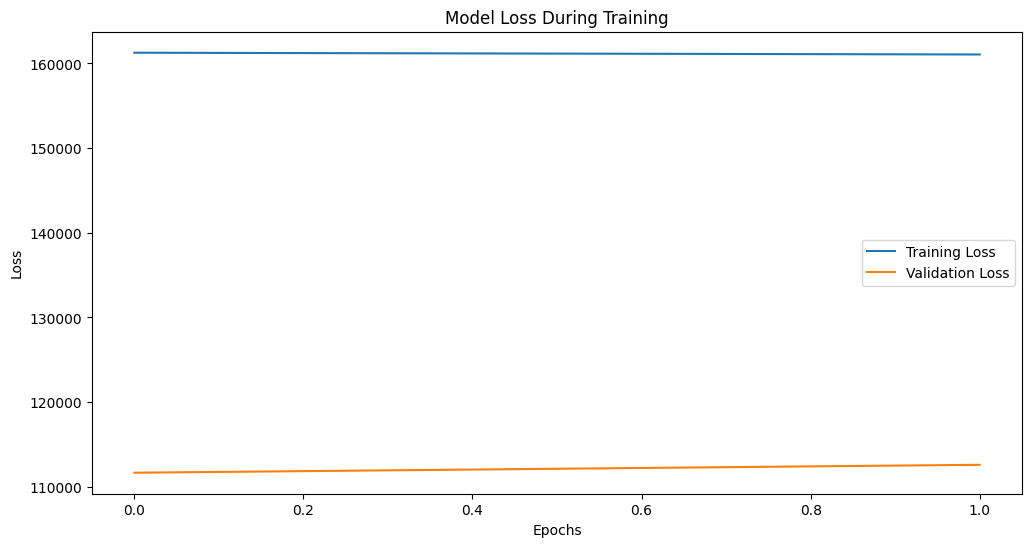

In [27]:
# Training history plotten
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
# Predictions machen
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MAPE on the Training Data: 96.88%
MAPE on the Validation Data: 96.72%


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


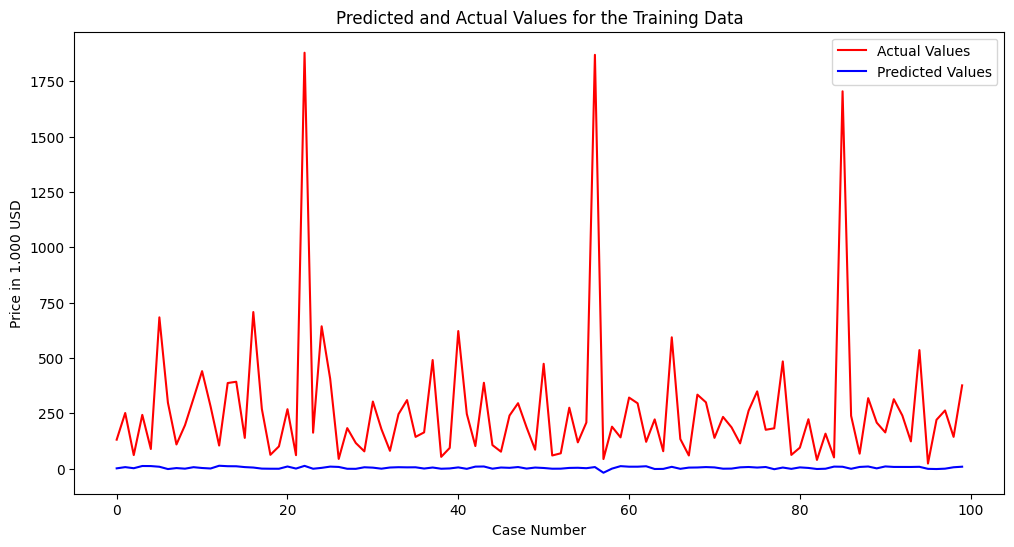

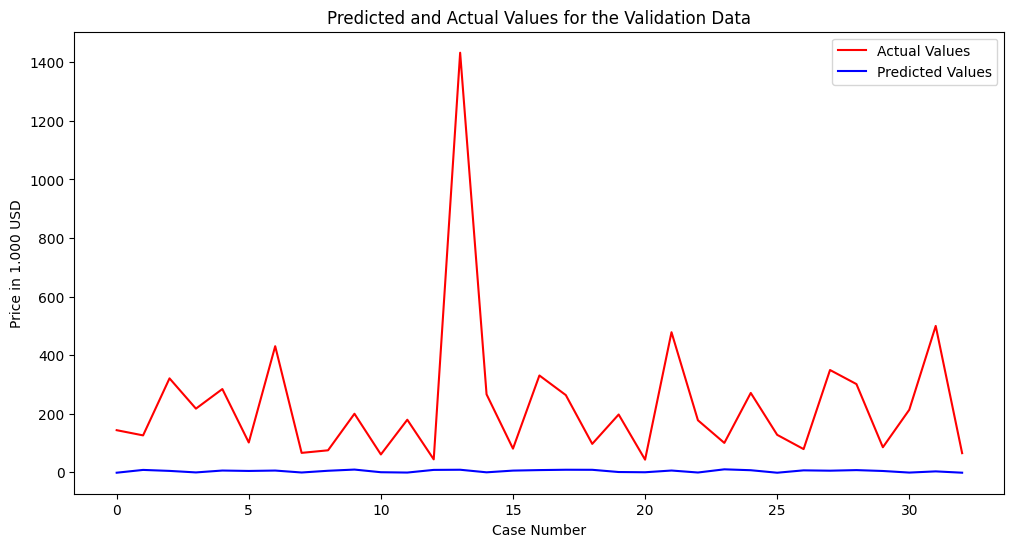

In [29]:
# Plotten
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Price in 1.000 USD')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')